# Dataset Distributuion

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import sys

DATAROOT = "/SSD2/bgkang/Chemomile/"
sys.path.append(DATAROOT)

plt.rcParams['font.family'] = 'DejaVu Sans'
data = {}

COLORMAP = {
	"red"   : "#BF616A",
	"blue"  : "#5E81AC",
	"green" : "#A3BE8C",
	"yellow": "#EBCB8B",
	"purple": "#B48EAD",
	"orange": "#D08770",
	"lightblue": "# ",
	"black" : "#2E3440",
	"white" : "#ECEFF4"
}

DATA = {
    "FP" : [],
    "AIT" : [],
    "HCOM" : [],
    "FLVL" : [],
    "FLVU" : [],
}

In [2]:
import torch
from src.data import Dataset

for key in DATA.keys():
    dataset = Dataset(target = key, root = DATAROOT)
    DATA[key] = torch.cat([data.y for data in dataset.total_loader]).detach().numpy()
    DATA[key] = DATA[key] * dataset.std + dataset.mean

	DataDump found for 'FP'. Loading dumped data.
Training : 754 | Validation : 94 | Test : 95
Total : 943
	DataDump found for 'AIT'. Loading dumped data.
Training : 443 | Validation : 55 | Test : 56
Total : 554
	DataDump found for 'HCOM'. Loading dumped data.
Training : 700 | Validation : 88 | Test : 88
Total : 876
	DataDump found for 'FLVL'. Loading dumped data.
Training : 372 | Validation : 46 | Test : 47
Total : 465
	DataDump found for 'FLVU'. Loading dumped data.
Training : 317 | Validation : 40 | Test : 40
Total : 397


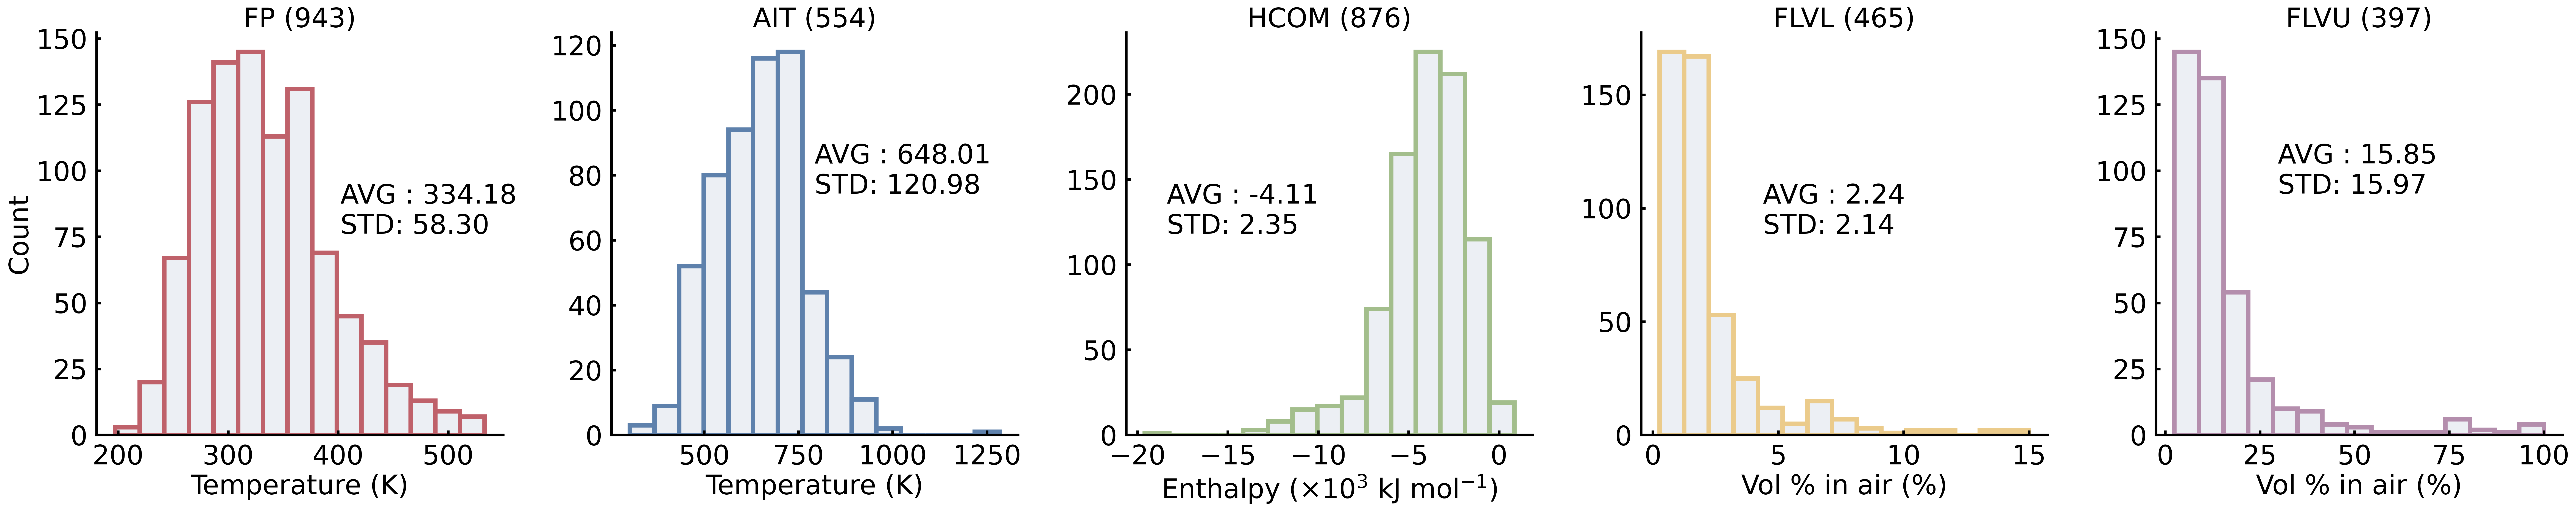

In [39]:
fig, ax = plt.subplots(1, 5, figsize = (40, 8), dpi = 300)

FONTSIZE = 30
ax[0].set_title(f"FP ({DATA['FP'].shape[0]})", fontsize = FONTSIZE)
ax[0].set_ylabel('Count', fontsize = FONTSIZE)
ax[0].set_xlabel("Temperature (K)", fontsize = FONTSIZE)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_linewidth(3)
ax[0].spines['bottom'].set_linewidth(3)
ax[0].tick_params(labelsize = FONTSIZE, direction = 'in', width = 3, pad = 10, length = 5)
ax[0].hist(DATA['FP'], bins = 15, color = "#ECEFF4", edgecolor = COLORMAP['red'], linewidth = 5)
ax[0].annotate(f"AVG : {DATA['FP'].mean():.02f}\nSTD: {DATA['FP'].std():.02f}", xy = (0.6, 0.5), xycoords = 'axes fraction', fontsize = FONTSIZE)

ax[1].set_title(f"AIT ({DATA['AIT'].shape[0]})", fontsize = FONTSIZE)
# ax[1].set_ylabel('Count', fontsize = FONTSIZE)
ax[1].set_xlabel("Temperature (K)", fontsize = FONTSIZE)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['left'].set_linewidth(3)
ax[1].spines['bottom'].set_linewidth(3)
ax[1].tick_params(labelsize = FONTSIZE, direction = 'in', width = 3, pad = 10, length = 5)
ax[1].hist(DATA['AIT'], bins = 15, color = "#ECEFF4", edgecolor = COLORMAP['blue'], linewidth = 5)
ax[1].annotate(f"AVG : {DATA['AIT'].mean():.02f}\nSTD: {DATA['AIT'].std():.02f}", xy = (0.5, 0.6), xycoords = 'axes fraction', fontsize = FONTSIZE)

ax[2].set_title(f"HCOM ({DATA['HCOM'].shape[0]})", fontsize = FONTSIZE)
# ax[2].set_ylabel('Count', fontsize = FONTSIZE)
ax[2].set_xlabel(r"Enthalpy ($\times 10^{3}$ kJ mol$^{-1}$)", fontsize = FONTSIZE)
ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].spines['left'].set_linewidth(3)
ax[2].spines['bottom'].set_linewidth(3)
ax[2].tick_params(labelsize = FONTSIZE, direction = 'in', width = 3, pad = 10, length = 5)
ax[2].hist(DATA['HCOM'] * 1.0E-9, bins = 15, color = "#ECEFF4", edgecolor = COLORMAP['green'], linewidth = 5)
ax[2].annotate(f"AVG : {(DATA['HCOM'] * 1.0E-9).mean():.02f}\nSTD: {(DATA['HCOM'] * 1.0E-9).std():.02f}", xy = (0.1, 0.5), xycoords = 'axes fraction', fontsize = FONTSIZE)

ax[3].set_title(f"FLVL ({DATA['FLVL'].shape[0]})", fontsize = FONTSIZE)
# ax[3].set_ylabel('Count', fontsize = FONTSIZE)
ax[3].set_xlabel("Vol % in air (%)", fontsize = FONTSIZE)
ax[3].spines['top'].set_visible(False)
ax[3].spines['right'].set_visible(False)
ax[3].spines['left'].set_linewidth(3)
ax[3].spines['bottom'].set_linewidth(3)
ax[3].tick_params(labelsize = FONTSIZE, direction = 'in', width = 3, pad = 10, length = 5)
ax[3].hist(DATA['FLVL'], bins = 15, color = "#ECEFF4", edgecolor = COLORMAP['yellow'], linewidth = 5)
ax[3].annotate(f"AVG : {DATA['FLVL'].mean():.02f}\nSTD: {DATA['FLVL'].std():.02f}", xy = (0.3, 0.5), xycoords = 'axes fraction', fontsize = FONTSIZE)

ax[4].set_title(f"FLVU ({DATA['FLVU'].shape[0]})", fontsize = FONTSIZE)
# ax[4].set_ylabel('Count', fontsize = FONTSIZE)
ax[4].set_xlabel("Vol % in air (%)", fontsize = FONTSIZE)
ax[4].spines['top'].set_visible(False)
ax[4].spines['right'].set_visible(False)
ax[4].spines['left'].set_linewidth(3)
ax[4].spines['bottom'].set_linewidth(3)
ax[4].tick_params(labelsize = FONTSIZE, direction = 'in', width = 3, pad = 10, length = 5)
ax[4].hist(DATA['FLVU'], bins = 15, color = "#ECEFF4", edgecolor = COLORMAP['purple'], linewidth = 5)
ax[4].annotate(f"AVG : {DATA['FLVU'].mean():.02f}\nSTD: {DATA['FLVU'].std():.02f}", xy = (0.3, 0.6), xycoords = 'axes fraction', fontsize = FONTSIZE)

plt.tight_layout()
plt.show()